In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json
import numpy as np
from pprint import pprint
import scipy, scipy.stats
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import math
import seaborn as sns

In [2]:
hdi_data = pd.read_csv("HDI_2016.csv")
hdi_data.head()
#hdi_data.columns


,HDI rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1,Development Bucket
0,1,Norway,0.949,81.7,17.7,12.7,"67,614",5,1,VERY HIGH HUMAN DEVELOPMENT
1,2,Australia,0.939,82.5,20.4,13.2,"42,822",19,3,VERY HIGH HUMAN DEVELOPMENT
2,2,Switzerland,0.939,83.1,16.0,13.4,"56,364",7,2,VERY HIGH HUMAN DEVELOPMENT
3,4,Germany,0.926,81.1,17.1,13.2,"45,000",13,4,VERY HIGH HUMAN DEVELOPMENT
4,5,Denmark,0.925,80.4,19.2,12.7,"44,519",13,6,VERY HIGH HUMAN DEVELOPMENT


In [3]:
qatar = hdi_data.loc[hdi_data["Country"] == "Qatar"]
qatar

,HDI rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1,Development Bucket
34,33,Qatar,0.856,78.3,13.4,9.8,"129,916",-32,33,VERY HIGH HUMAN DEVELOPMENT


In [4]:
country = hdi_data['Country']
hdi = hdi_data["Human Development Index (HDI) "]
life_expectancy = hdi_data["Life expectancy at birth"]
mean_schooling = hdi_data["Mean years of schooling"]
GNI_per_capita = hdi_data["Gross national income (GNI) per capita"]
expected_years = hdi_data["Expected years of schooling "]

In [13]:
print(f'Average Mean Years of Schooling {round((mean_schooling.mean()),2)} years')
print(f'Average Expected Years of Schooling {round((expected_years.mean()),2)} years')
print(f'Average Life Expectancy {round((life_expectancy.mean()),2)} years')
#print(f'Average GNI per Capita {GNI_per_capita.mean()} dollars')


Average Mean Years of Schooling 8.37 years
Average Expected Years of Schooling 12.98 years
Average Life Expectancy 71.35 years


In [ ]:
# graph Happy Planet Index vs GDP per capita
# onlylow = merged_df2.loc[merged_df2['Development Bucket'] == "LOW", :]
# onlymed = merged_df2.loc[merged_df2['Development Bucket'] == "MEDIUM", :]
# onlyhigh = merged_df2.loc[merged_df2['Development Bucket'] == "HIGH", :]
# onlyvhigh = merged_df2.loc[merged_df2['Development Bucket'] == "VERY HIGH", :]

# xlow = onlylow['GDP/capita']
# xmed = onlymed['GDP/capita']
# xhigh = onlyhigh['GDP/capita']
# xvhigh = onlyvhigh['GDP/capita']

# ylow = onlylow['Happy Planet Index']
# ymed = onlymed['Happy Planet Index']
# yhigh = onlyhigh['Happy Planet Index']
# yvhigh = onlyvhigh['Happy Planet Index']

# zlow = onlylow['Population']
# zmed = onlymed['Population']
# zhigh = onlyhigh['Population']
# zvhigh = onlyvhigh['Population']

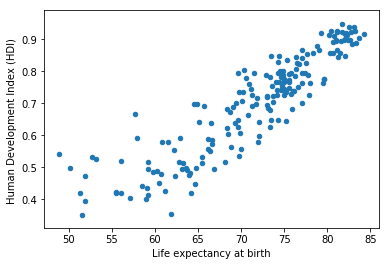

In [16]:
# Life expectancy at birth v HDI

df1 = hdi_data[["Human Development Index (HDI) ","Life expectancy at birth"]]
df1 = df1.set_index('Life expectancy at birth')
df1 = df1.sort_index(ascending=True)
df1 = df1.reset_index()
df1.plot(x='Life expectancy at birth',y="Human Development Index (HDI) ",kind='scatter')



In [17]:
x1 = df1["Life expectancy at birth"]
y1 = df1["Human Development Index (HDI) "]

c = np.corrcoef(x1, y1)
c1 = c[1,0]
c1

0.9018578272332313

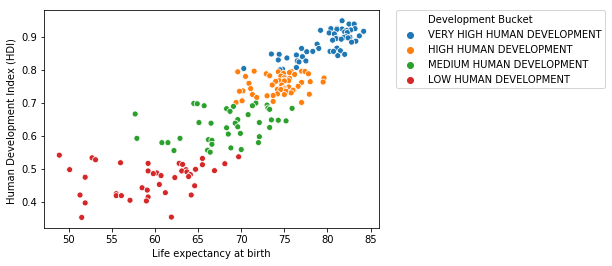

In [18]:
sns.scatterplot(x='Life expectancy at birth',y="Human Development Index (HDI) ", data = hdi_data, hue="Development Bucket")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

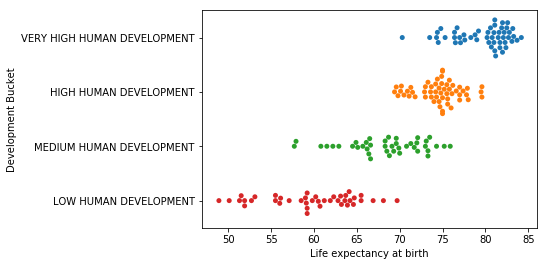

In [19]:
sns.swarmplot(x="Life expectancy at birth", y="Development Bucket", data=hdi_data)

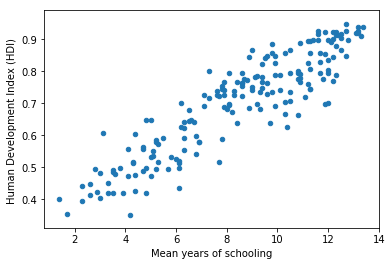

In [20]:
# Mean years of schooling v HDI

df2 = hdi_data[["Human Development Index (HDI) ","Mean years of schooling"]]
df2 = df2.set_index('Mean years of schooling')
df2 = df2.sort_index(ascending=True)
df2 = df2.reset_index()
df2.plot(x='Mean years of schooling',y="Human Development Index (HDI) ",kind='scatter')

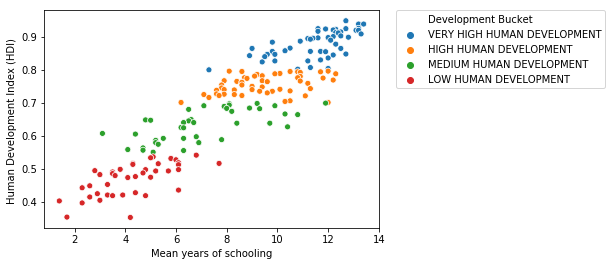

In [21]:
sns.scatterplot(x='Mean years of schooling',y="Human Development Index (HDI) ", data = hdi_data, hue="Development Bucket")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

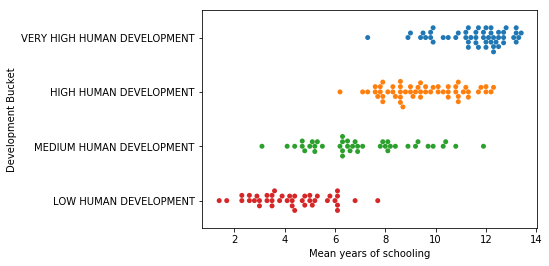

In [22]:
sns.swarmplot(x="Mean years of schooling", y="Development Bucket", data=hdi_data)


In [23]:
x2 = df2["Mean years of schooling"]
y2 = df2["Human Development Index (HDI) "]

c = np.corrcoef(x2, y2)
c2 = c[1,0]
c2

0.9076476273848932

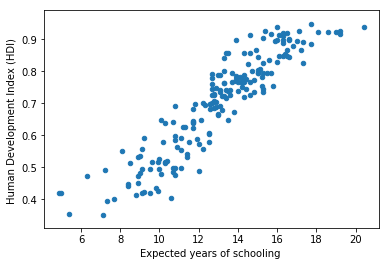

In [24]:
# Expected years of schooling v HDI

df4 = hdi_data[["Human Development Index (HDI) ","Expected years of schooling "]]
df4 = df4.set_index('Expected years of schooling ')
df4 = df4.sort_index(ascending=True)
df4 = df4.reset_index()
df4.plot(x='Expected years of schooling ',y="Human Development Index (HDI) ",kind='scatter')

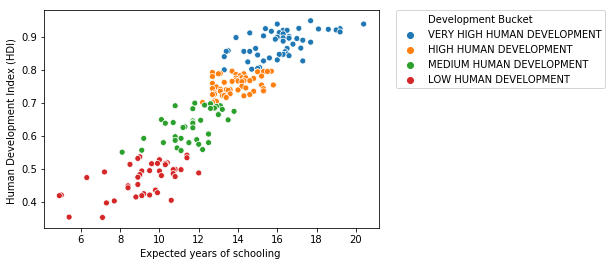

In [25]:
sns.scatterplot(x='Expected years of schooling ',y="Human Development Index (HDI) ", data = hdi_data, hue="Development Bucket")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

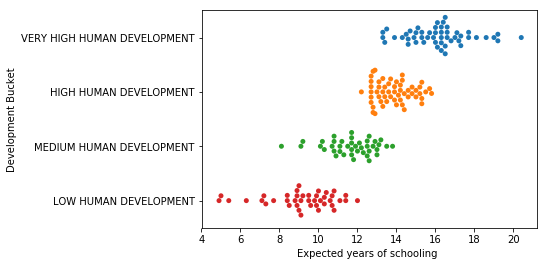

In [26]:
sns.swarmplot(x="Expected years of schooling ", y="Development Bucket", data=hdi_data)


In [27]:
x4 = df4["Expected years of schooling "]
y4 = df4["Human Development Index (HDI) "]

c = np.corrcoef(x4, y4)
c4 = c[1,0]
c4

0.9176089604722469

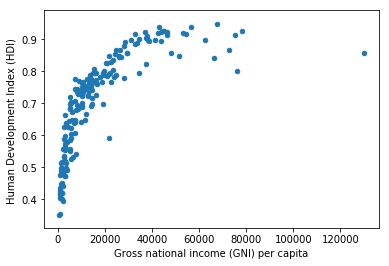

In [30]:
df3 = hdi_data[["Human Development Index (HDI) ","Gross national income (GNI) per capita"]]
df3 = df3.set_index('Gross national income (GNI) per capita')
df3 = df3.sort_index(ascending=True)
df3 = df3.reset_index()
df3['Gross national income (GNI) per capita'] = df3['Gross national income (GNI) per capita'].str.replace(',','').astype('float')
df3.plot(x='Gross national income (GNI) per capita',y="Human Development Index (HDI) ",kind='scatter')


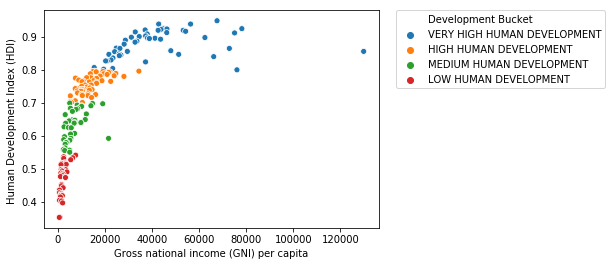

In [32]:

hdi_data['Gross national income (GNI) per capita'] = hdi_data['Gross national income (GNI) per capita'].str.replace(',','').astype('float')
sns.scatterplot(x='Gross national income (GNI) per capita',y="Human Development Index (HDI) ", data = hdi_data, hue="Development Bucket")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

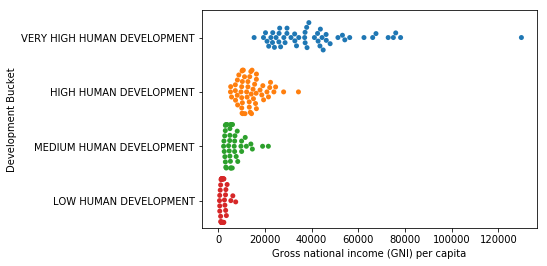

In [33]:
sns.swarmplot(x="Gross national income (GNI) per capita", y="Development Bucket", data=hdi_data)


In [34]:
x3 = df3["Gross national income (GNI) per capita"]
y3 = df3["Human Development Index (HDI) "]

c = np.corrcoef(x3, y3)
c3 = c[1,0]
c3

0.736899840546767

In [35]:
qatar = hdi_data.loc[hdi_data["Country"] == "Qatar"]
qatar

,HDI rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1,Development Bucket
34,33,Qatar,0.856,78.3,13.4,9.8,129916.0,-32,33,VERY HIGH HUMAN DEVELOPMENT


In [37]:
GNI_per_capita = hdi_data["Gross national income (GNI) per capita"]


In [40]:
print(f'Average Mean Years of Schooling {round((mean_schooling.mean()),2)} years')
print(f'Average Expected Years of Schooling {round((expected_years.mean()),2)} years')
print(f'Average Life Expectancy {round((life_expectancy.mean()),2)} years')
print(f'Average GNI per Capita {round((GNI_per_capita.mean()),2)} dollars')

Average Mean Years of Schooling 8.37 years
Average Expected Years of Schooling 12.98 years
Average Life Expectancy 71.35 years
Average GNI per Capita 17313.84 dollars


In [53]:
qatar = qatar[["Country", "Human Development Index (HDI) ", "Life expectancy at birth", 
               "Expected years of schooling ", "Mean years of schooling", "Gross national income (GNI) per capita"
              ]]
qatar["Human Development Index (HDI) "].values[0]

0.856

In [60]:


qatar2 = pd.DataFrame([{'Country': qatar["Country"].values[0], 
                        'Life Expectancy': qatar["Life expectancy at birth"].values[0], 
                        'Expected years Schooling': qatar["Expected years of schooling "].values[0], 
                        'Mean years Schooling': qatar["Mean years of schooling"].values[0], 
                        'GNI per capita': qatar["Gross national income (GNI) per capita"].values[0]},
                       {'Country': "World Average",
                        'Life Expectancy': round((life_expectancy.mean()),2),
                        'Expected years Schooling': round((expected_years.mean()),2),
                        'Mean years Schooling': round((mean_schooling.mean()),2),
                        'GNI per capita': round((GNI_per_capita.mean()),2)}])
                       
                                               
                    
qatar2

,Country,Expected years Schooling,GNI per capita,Life Expectancy,Mean years Schooling
0,Qatar,13.40,129916.00,78.30,9.80
1,World Average,12.98,17313.84,71.35,8.37
